In [1]:
# Imports here
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

import torch
import numpy as np
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from PIL import Image
from collections import OrderedDict
import json
import torchvision 
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
import pdb

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True) 
from torch.utils.tensorboard import SummaryWriter


In [2]:
data_dir = 'Dataset'
train_dir = data_dir + '/train'
test_dir = data_dir + '/test'
using_gpu = torch.cuda.is_available()

In [3]:
#train_transforms = transforms.Compose([transforms.ToTensor(),
                                       #transforms.Normalize([0.485, 0.456, 0.406], 
                                                           # [0.229, 0.224, 0.225])])



In [4]:
#train_transform  = tv.transforms.Compose([tv.transforms.Grayscale(num_output_channels=1),
                                    #tv.transforms.ToTensor(), 
                                    #tv.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [5]:
data_transform = transforms.Compose([
        transforms.RandomResizedCrop(32),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
    ])

In [6]:
train_set  = torchvision.datasets.ImageFolder(train_dir, 
                                        transform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])

 )

In [7]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True)

In [8]:
classes = ('category 1','category 2','category 3','category 4')

category 2 category 4 category 2 category 4


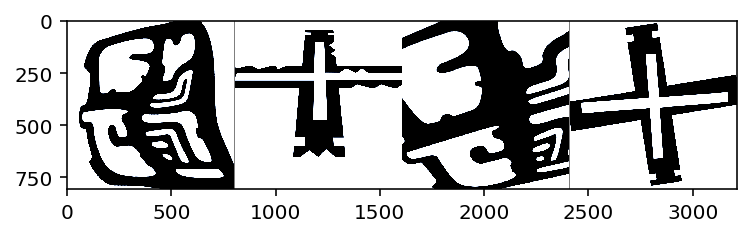

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()


In [11]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 12, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(12*197*197, 120)
        self.fc2 = nn.Linear(120, 60)


    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    # Reshaping the tensor to BATCH_SIZE x 320. Torch infers this from other dimensions when one of the parameter is -1.
        x = x.view(-1, 12 * 197 * 197)
        x = F.relu(self.fc1(x))
        x = F.dropout(x)
        x = self.fc2(x)
        return x

In [12]:
network = Network()

In [13]:
for name, param in network.named_parameters():
    print(name,'\t\t',param.shape)

conv1.weight 		 torch.Size([6, 3, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 465708])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])


In [14]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=40)
optimizer = optim.SGD(network.parameters(), lr=0.001)
  

In [15]:
for epoch in range(70):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch # completed 6000 image in single epoch with 
                               # batch size 100 
        images, labels = batch 

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad() # doning zero grad value after every mini batch 
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print(
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )



epoch 0 total_correct: 121 loss: 41.761494636535645
epoch 1 total_correct: 172 loss: 31.48314344882965
epoch 2 total_correct: 164 loss: 29.7462557554245
epoch 3 total_correct: 174 loss: 25.313972055912018
epoch 4 total_correct: 173 loss: 24.077635884284973
epoch 5 total_correct: 195 loss: 21.693854212760925
epoch 6 total_correct: 184 loss: 19.207735896110535
epoch 7 total_correct: 214 loss: 18.166834354400635
epoch 8 total_correct: 204 loss: 18.276630461215973
epoch 9 total_correct: 223 loss: 16.764476478099823
epoch 10 total_correct: 220 loss: 16.164486944675446
epoch 11 total_correct: 229 loss: 15.176079630851746
epoch 12 total_correct: 254 loss: 14.592344164848328
epoch 13 total_correct: 242 loss: 14.205197483301163
epoch 14 total_correct: 254 loss: 13.150950193405151
epoch 15 total_correct: 257 loss: 13.50049814581871
epoch 16 total_correct: 253 loss: 12.975923866033554
epoch 17 total_correct: 264 loss: 12.97935700416565
epoch 18 total_correct: 263 loss: 13.310108602046967
epoch 19

In [16]:
@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in prediction_loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat((all_preds, preds),dim=0)
    return all_preds

In [17]:
with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=4)
    train_preds = get_all_preds(network, prediction_loader)

In [18]:
import numpy
train_set.targets = torch.from_numpy(numpy.array(train_set.targets, dtype='int64'))

In [19]:
preds_correct = get_num_correct(train_preds, train_set.targets)

print('total correct:', preds_correct)
print('accuracy:', preds_correct / len(train_set))


total correct: 379
accuracy: 0.8613636363636363


In [20]:
#pt_tensor_from_list = torch.FloatTensor(image_trainset.targets)